In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore
import numpy as np


In [2]:
df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# CALCULATE MEAN AND STD OF GLUCOSE COLUMN
glucose_mean = df['Glucose'].mean()
glucose_std = df['Glucose'].std()

print(f"Mean : {glucose_mean}")
print(f"S.T.D : {glucose_std}")



Mean : 120.89453125
S.T.D : 31.97261819513622


In [4]:
# Calculate z-score for glucose level of 168 (using manual method)

glucose_value = 168
z_score_168_manual = (glucose_value - glucose_mean) / glucose_std
print(f"z-score manual : {z_score_168_manual}")

z-score manual : 1.4733065794769926


In [5]:
df['Glucose_zscore'] = zscore(df['Glucose'])
print(df)




     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  Glucose_zscore  
0                       0.627   50        1      

In [6]:
row_index = df[ df['Glucose'] == glucose_value].index


In [7]:
z_score_168_using_function = df['Glucose_zscore'].iloc[row_index[0]]
print(f"z-score value using function {z_score_168_using_function}")

z-score value using function 1.4742667011686503


In [8]:
# Calculate the percentile for this z-score
percentile_168 = stats.norm.cdf(z_score_168_using_function) * 100 
print(f"Percentile for glucose level of 168: {percentile_168}%")

Percentile for glucose level of 168: 92.97951014882595%


In [9]:
# Find z-score at 30th percentile
z_score_30 = stats.norm.ppf(0.30)
print(f"z-score at the 30the percentile: {z_score_30}")

z-score at the 30the percentile: -0.5244005127080409


In [10]:
# Calculatre corresponding Glucose value for the z-score of the 30th percentile
glucose_value_30 = glucose_mean + z_score_30 * glucose_std
print(f"Glucose value corresponding to 30th percentile: {glucose_value_30}")

# Given z-score of 2.8, calculate the corresponding Glucose level
z_score_given = 2.8
glucose_value_given = glucose_mean + z_score_given * glucose_std
print(f"Glucose value for z-score of 2.8: {glucose_value_given}")

Glucose value corresponding to 30th percentile: 104.12807387585212
Glucose value for z-score of 2.8: 210.4178621963814


In [11]:
# Calculate the percentile for the zscore of 2.8
percentile_given = stats.norm.cdf(z_score_given) * 100 # Multiply by 100 to get percentage
print(f"Percentage for z-score of 2.8 : {percentile_given}%")

Percentage for z-score of 2.8 : 99.7444869669572%


# Tips dataset

In [13]:
# QQ plot is used to check if our dataset follows normal distribution or not

data = pd.read_csv("tips.csv")

In [14]:
# Extract the total_bill column into a new series
total_bill_series = data['total_bill']
print(total_bill_series.head())

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64


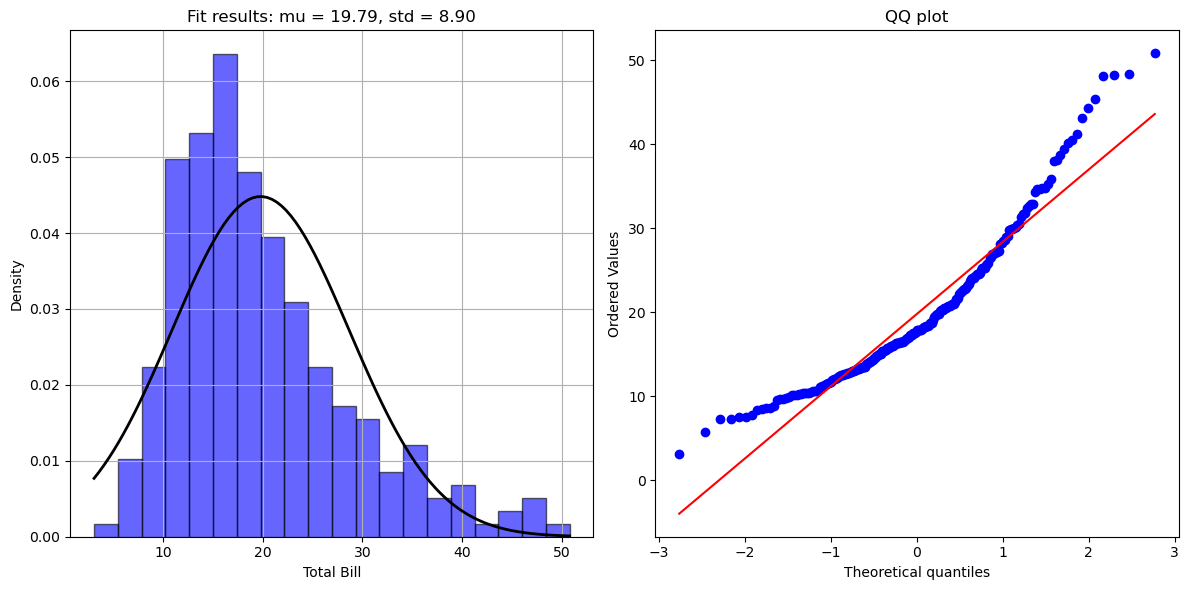

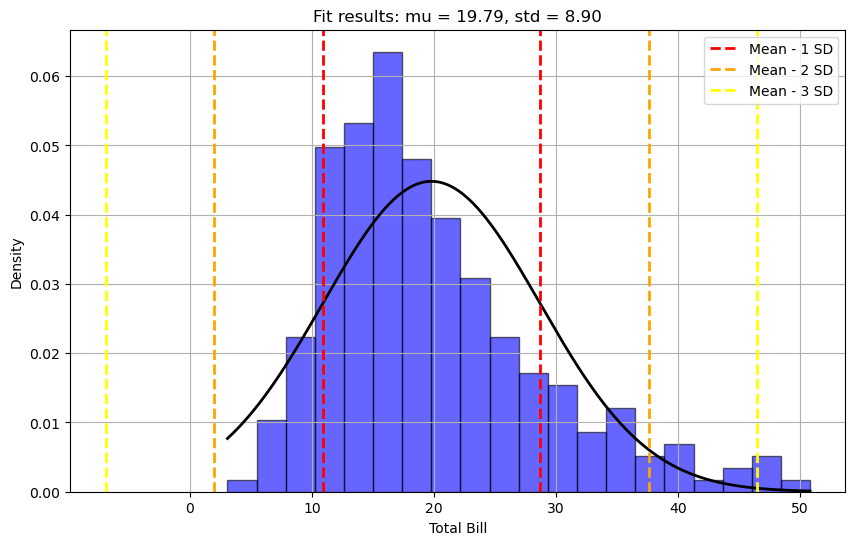

In [15]:
# Calculate mean and standard deviation
mu, std = total_bill_series.mean(), total_bill_series.std()

# Calculate z-score for each value
z_scores = (total_bill_series - mu) /std

# Plot normal distribution graph of total_bill
plt.figure(figsize=(12,6))

# Histogram
plt.subplot(1,2,1)
plt.hist(total_bill_series, bins=20, density=True, alpha=0.6, color='b', edgecolor='black')

# Fit a normal distribution to the data
x = np.linspace(total_bill_series.min(), total_bill_series.max(), 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x,p,'k', linewidth=2)
title= "Fit results: mu = %.2f, std = %.2f" % (mu,std)
plt.title(title)
plt.xlabel('Total Bill')
plt.ylabel('Density')
plt.grid(True)

# QQ Plot
plt.subplot(1,2,2)
stats.probplot(total_bill_series, dist='norm', plot=plt)
plt.title('QQ plot')
plt.tight_layout()
plt.show()

# Plot graph showing mean +- 3 SD
plt.figure(figsize=(10,6))
plt.hist(total_bill_series, bins=20, density=True, alpha=0.6, color='b', edgecolor='black')

# Fit a normal distribution to the data
x = np.linspace(total_bill_series.min(), total_bill_series.max(), 1000)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f, std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Total Bill')
plt.ylabel('Density')
plt.grid(True)

cols = [None, 'red', 'orange', 'yellow']
for i in range(1, 4):
    plt.axvline(mu-i * std, color = cols[i], linestyle = "--", linewidth = 2, label = f"Mean - {i} SD")
    plt.axvline(mu + i * std, color = cols[i], linestyle = "--", linewidth = 2)

plt.legend()
plt.show()

In [17]:
# Check if mean +- 1SD, mean +- 2SD, amdn mean +- 3DS satisfy the empirical rule 
within_1sd = (z_scores <= 1) & (z_scores >= -1)
within_2sd = (z_scores <= 2) & (z_scores >= -2)
within_3sd = (z_scores <= 3) & (z_scores >= -3)

percentage_within_1sd = np.sum(within_1sd)/ len(total_bill_series) * 100
percentage_within_2sd = np.sum(within_2sd)/ len(total_bill_series) * 100
percentage_within_3sd = np.sum(within_3sd)/ len(total_bill_series) * 100

print(f"Percentage of data within mean +- 1 SD : {percentage_within_1sd:.2f}%")
print(f"Percentage of data within mean +- 2 SD : {percentage_within_2sd:.2f}%")
print(f"Percentage of data within mean +- 3 SD : {percentage_within_3sd:.2f}%")


Percentage of data within mean +- 1 SD : 72.13%
Percentage of data within mean +- 2 SD : 94.26%
Percentage of data within mean +- 3 SD : 98.36%


In [21]:
# Create DataFrame to store total_bill, z-score, and within 1sd, within 2sd and within 3 sd flags
import os

result_df = pd.DataFrame({
    'total_bill': total_bill_series,
    "z_score" : z_scores,
    'within_1sd': within_1sd,
    'within_2sd': within_2sd,
    'within_3sd': within_3sd,
})

if os.path.exists("tempcsv.csv"):
    os.remove('tempcsv.csv')

result_df.to_csv("tempcsv.csv", index = False)


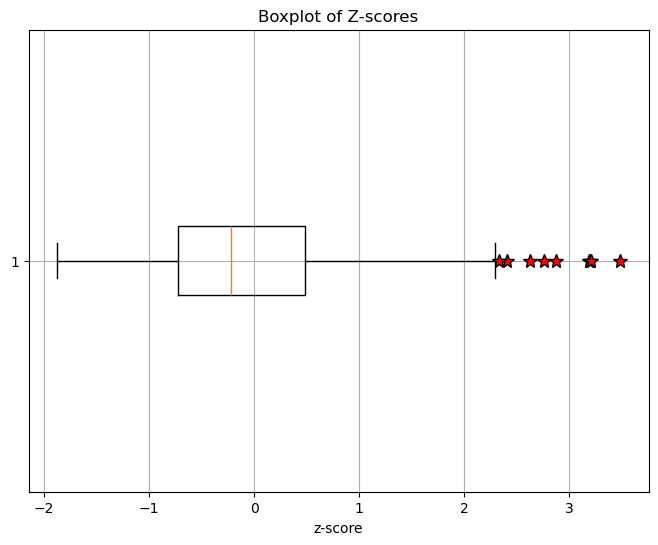

In [25]:
import seaborn as sns

plt.figure(figsize = (8, 6))

plt.boxplot(result_df['z_score'], 
            vert = False, 
            flierprops = dict(marker = "*",
                              markerfacecolor = 'red',
                              markersize = 10
                             )
           )

plt.xlabel("z-score")
plt.title("Boxplot of Z-scores")
plt.grid(True)
plt.show()
           